 # Лабораторная работа №3 Проведение исследований с решающим деревом


## 2. Создание бейзлайна и оценка качества

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor



import seaborn as sns
import matplotlib.pyplot as plt

### Классификация

In [2]:
df = pd.read_csv(
    "train.csv"
)

df.head()


/tmp/ipykernel_10403/4101760861.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Предобработка.

In [3]:
drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Берем 20000 строк как в 1 лабораторной.

In [4]:
sample_size = 20000
df_sample = df.sample(n=sample_size, random_state=42)

X = df_sample.drop('Credit_Score', axis=1)
y = df_sample['Credit_Score']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)




Создаем пайплайн и обучаем.

In [5]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

dt_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [6]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [7]:
y_pred = dt_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.64675
              precision    recall  f1-score   support

        Good       0.55      0.56      0.56       705
        Poor       0.62      0.62      0.62      1175
    Standard       0.69      0.69      0.69      2120

    accuracy                           0.65      4000
   macro avg       0.62      0.63      0.62      4000
weighted avg       0.65      0.65      0.65      4000



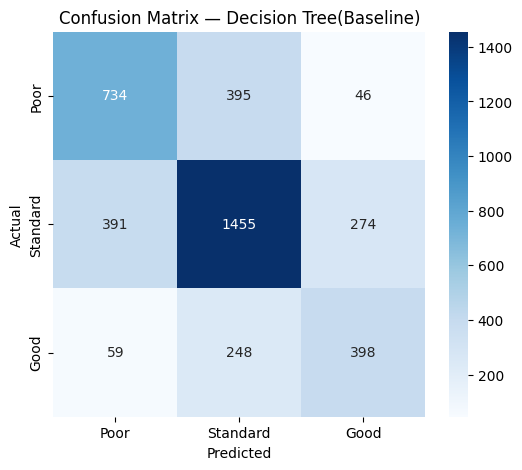

In [9]:
cm = confusion_matrix(y_test, y_pred, labels=['Poor', 'Standard', 'Good'])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Poor', 'Standard', 'Good'],
    yticklabels=['Poor', 'Standard', 'Good']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix — Decision Tree(Baseline)')
plt.show()


Результат превзошел бейзлайн knn. Но не логистической регрессии.

### Регрессия

In [17]:
df_reg = pd.read_csv(
    "vestiaire_20k.csv"
)

df_reg.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,42438630,Wool hat,Wool hat Napapijri Black size 55 cm in Wool,"one size, like new",Napapijri Wool Hats & pull on hats,Men,Men Accessories,Autumn / Winter,Never worn,0.0,...,Tourcoing,25355068,Raffaele25355068,1-2 days,Italy,11.0,27.0,0.0,131.0,100.0
1,30324738,Leather flats,Leather flats Bruno Magli Black size 43.5 EU i...,"Excellent condition! UK size 9.5, EU 43.5",Bruno Magli Leather Flats,Men,Men Shoes,All seasons,Very good condition,6.0,...,Tourcoing,12877585,stelios12877585,NaN,Greece,5.0,2.0,649116.0,5.0,100.0
2,39089334,Polo shirt,Polo shirt LA MARTINA Multicolour size XXL Int...,"La Martina long sleeve polo shirt, size XXL in...",LA MARTINA Cotton Polo shirts,Men,Men Clothing,All seasons,Good condition,2.0,...,Tourcoing,21283960,anneanna21283960,1-2 days,Germany,132.0,90.0,0.0,25.0,95.0
3,39285681,Scarf,Scarf Twinset White in Cotton,Lightweight cotton scarf. White color with 2 h...,Twinset Cotton Scarves,Women,Women Accessories,Autumn / Winter,Very good condition,7.0,...,Tourcoing,15273943,bianca15273943,3-5 days,Italy,5.0,38.0,0.0,7.0,100.0
4,41107394,Leather low trainers,Leather low trainers Tod's Blue size 9.5 UK in...,"Iconic Tod's shoe, dark blue color. Mix suede ...",Tod's Leather Trainers,Men,Men Shoes,All seasons,Good condition,3.0,...,Tourcoing,19395265,Nicchia_20,6-7 days,Italy,4.0,15.0,0.0,163.0,100.0


Предобработка.

In [18]:
drop_cols = [
    'product_id', 'product_name', 'product_description', 'brand_url',
    'seller_username', 'brand_name', 'product_keywords', 'seller_id', 'brand_id', 'seller_price' , 'seller_country'
]


df_reg = df_reg.drop(columns=drop_cols)

df_reg = df_reg.dropna(subset=[
    'product_category', 'has_cross_border_fees', 'usually_ships_within'
])

Создание пайплайна и обучение.

In [19]:
df_reg_sample = df_reg

X_sample = df_reg_sample.drop('price_usd', axis=1)
y_sample = df_reg_sample['price_usd']

num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [22]:
tree_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', DecisionTreeRegressor(
            random_state=42,
            max_depth=10,
            min_samples_split=10,
            min_samples_leaf=5
        ))
    ]
)

In [23]:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['product_like_count', 'seller_earning', 'buyers_fees',
       'seller_products_sold', 'seller_num_products_listed',
       'seller_community_rank', 'seller_num_followers', 'seller_pass_rate'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['product_type', '...roduct_category',
       'product_season', 'product_condition', 'sold', 'reserved', 'available',
       'in_stock', 'should_be_gone', 'product_material', 'product_color',
       'seller_badge', 'has_cross_border_fees', 'warehouse_name',
       'usually_ships_within'],
      dtype='object'))])),
                ('model',
                 DecisionTreeRegressor(max_depth=10, min_samples_leaf=5,
                                       min_samples_split=10,
                                       random_state=42))])

In [24]:
y_pred = tree_pipeline.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))



MAE: 15.175285373176042
RMSE: 351.44242579240756
R2: 0.896314719018412


Не очень впечатляющий результат по RMSE и R2, но MAE довольно низкая.

## 3. Улучшение бейзлайна

### Классификация

In [22]:
df = pd.read_csv(
    "train.csv"
)

df.head()

/tmp/ipykernel_7935/3975237315.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Делаем первичную предобработку.

In [23]:
drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Вспомним про гипотезу из первой лабораторной о том, что правильное распределение классов может помочь улучшить качество модели.

In [24]:
print(df['Credit_Score'].value_counts())

sample_size_per_class = 20000 // df['Credit_Score'].nunique()

df_sample = (
    df.groupby('Credit_Score', group_keys=False)
      .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))
)

print(df_sample['Credit_Score'].value_counts())

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64
Credit_Score
Good        6666
Poor        6666
Standard    6666
Name: count, dtype: int64


/tmp/ipykernel_7935/422736674.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))


In [25]:
X_sample = df_sample.drop('Credit_Score', axis=1)
y_sample = df_sample['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample,
    test_size=0.2,
    random_state=42,
    stratify=y_sample
)

In [26]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

dt_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [27]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [29]:
y_pred = dt_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.66925
              precision    recall  f1-score   support

        Good       0.70      0.75      0.72      1333
        Poor       0.73      0.71      0.72      1333
    Standard       0.57      0.55      0.56      1334

    accuracy                           0.67      4000
   macro avg       0.67      0.67      0.67      4000
weighted avg       0.67      0.67      0.67      4000



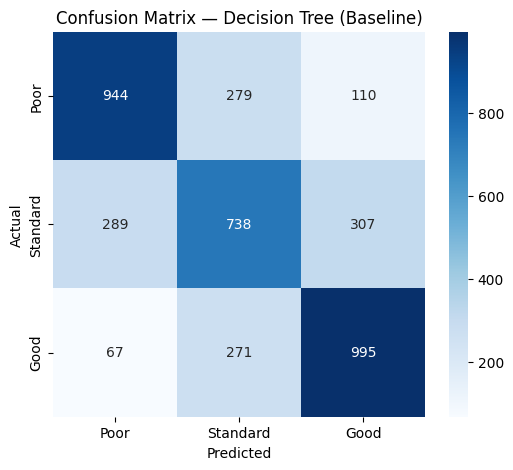

In [30]:
cm = confusion_matrix(y_test, y_pred, labels=['Poor', 'Standard', 'Good'])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Poor', 'Standard', 'Good'],
    yticklabels=['Poor', 'Standard', 'Good']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix — Decision Tree (Baseline)')
plt.show()


Получили хороший прирост в качестве. Продолжаем анализ.

In [15]:
df = pd.read_csv(
    "train.csv"
)

df.head()

/tmp/ipykernel_7935/3975237315.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Создадим числовой признак из `Credit_History_Age`.

In [16]:
import re

def convert_credit_history(age_str):
    if pd.isna(age_str):
        return None
    match = re.match(r'(\d+)\s*Years\s*and\s*(\d+)?\s*Months', age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2)) if match.group(2) else 0
        return years + months / 12
    else:
        return None

df['Credit_History_Age_num'] = df['Credit_History_Age'].apply(convert_credit_history)

df[['Credit_History_Age', 'Credit_History_Age_num']].head()

num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# df = df[(df['Credit_History_Age_num'].between(0, 100))]

# df = df[(df['Age'].between(0, 100))]

drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [17]:
print(df['Credit_Score'].value_counts())

sample_size_per_class = 20000 // df['Credit_Score'].nunique()

df_sample = (
    df.groupby('Credit_Score', group_keys=False)
      .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))
)

print(df_sample['Credit_Score'].value_counts())

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64
Credit_Score
Good        6666
Poor        6666
Standard    6666
Name: count, dtype: int64


/tmp/ipykernel_7935/422736674.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))


In [18]:
X_sample = df_sample.drop('Credit_Score', axis=1)
y_sample = df_sample['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample,
    test_size=0.2,
    random_state=42,
    stratify=y_sample
)

In [19]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

dt_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [20]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Age_num'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [21]:
y_pred = dt_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.657
              precision    recall  f1-score   support

        Good       0.70      0.71      0.70      1333
        Poor       0.71      0.72      0.71      1333
    Standard       0.56      0.54      0.55      1334

    accuracy                           0.66      4000
   macro avg       0.66      0.66      0.66      4000
weighted avg       0.66      0.66      0.66      4000



Никакого улучшения. Попробуем обработать Age и Credit_History_Age.

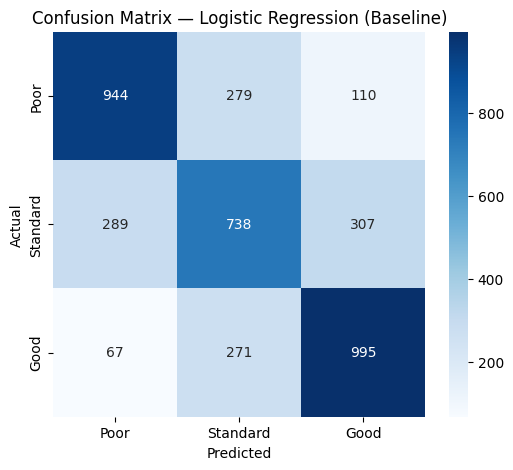

In [26]:
cm = confusion_matrix(y_test, y_pred, labels=['Poor', 'Standard', 'Good'])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Poor', 'Standard', 'Good'],
    yticklabels=['Poor', 'Standard', 'Good']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix — Logistic Regression (Baseline)')
plt.show()


In [4]:
df = pd.read_csv(
    "train.csv"
)

df.head()

/tmp/ipykernel_7935/3975237315.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
import re

def convert_credit_history(age_str):
    if pd.isna(age_str):
        return None
    match = re.match(r'(\d+)\s*Years\s*and\s*(\d+)?\s*Months', age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2)) if match.group(2) else 0
        return years + months / 12
    else:
        return None

df['Credit_History_Age_num'] = df['Credit_History_Age'].apply(convert_credit_history)

df[['Credit_History_Age', 'Credit_History_Age_num']].head()

num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df[(df['Credit_History_Age_num'].between(0, 100))]

df = df[(df['Age'].between(0, 100))]


drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [6]:
print(df['Credit_Score'].value_counts())

sample_size_per_class = 20000 // df['Credit_Score'].nunique()

df_sample = (
    df.groupby('Credit_Score', group_keys=False)
      .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))
)

print(df_sample['Credit_Score'].value_counts())

Credit_Score
Standard    44748
Poor        24401
Good        14882
Name: count, dtype: int64
Credit_Score
Good        6666
Poor        6666
Standard    6666
Name: count, dtype: int64


/tmp/ipykernel_7935/422736674.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))


In [9]:
X_sample = df_sample.drop('Credit_Score', axis=1)
y_sample = df_sample['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample,
    test_size=0.2,
    random_state=42,
    stratify=y_sample
)

In [10]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

dt_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [11]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Age_num'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [12]:
y_pred = dt_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6825
              precision    recall  f1-score   support

        Good       0.72      0.73      0.72      1333
        Poor       0.73      0.74      0.74      1333
    Standard       0.59      0.58      0.58      1334

    accuracy                           0.68      4000
   macro avg       0.68      0.68      0.68      4000
weighted avg       0.68      0.68      0.68      4000



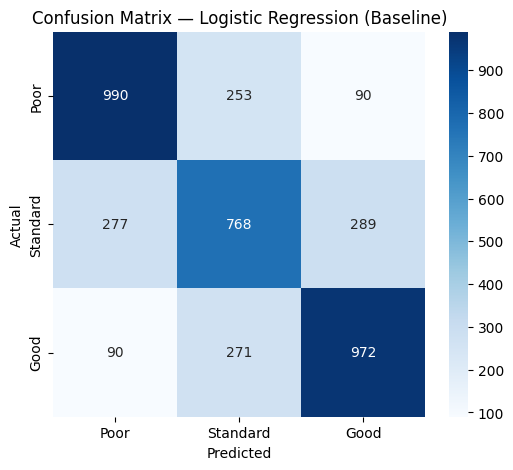

In [13]:
cm = confusion_matrix(y_test, y_pred, labels=['Poor', 'Standard', 'Good'])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Poor', 'Standard', 'Good'],
    yticklabels=['Poor', 'Standard', 'Good']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix — Logistic Regression (Baseline)')
plt.show()


Результат улучшился.

In [14]:
param_grid = {
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 10],
    'classifier__min_samples_leaf': [1, 5]}

grid_search = GridSearchCV(
    estimator=dt_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Accuracy: 0.72175
              precision    recall  f1-score   support

        Good       0.71      0.86      0.78      1333
        Poor       0.74      0.77      0.76      1333
    Standard       0.72      0.53      0.61      1334

    accuracy                           0.72      4000
   macro avg       0.72      0.72      0.71      4000
weighted avg       0.72      0.72      0.71      4000



Лучшие параметры: `{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}`. Результат для классификации - лучший из всех, полученных ранее.

### Регрессия

In [31]:
df_reg = pd.read_csv(
    "vestiaire_20k.csv"
)

df_reg.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,42438630,Wool hat,Wool hat Napapijri Black size 55 cm in Wool,"one size, like new",Napapijri Wool Hats & pull on hats,Men,Men Accessories,Autumn / Winter,Never worn,0.0,...,Tourcoing,25355068,Raffaele25355068,1-2 days,Italy,11.0,27.0,0.0,131.0,100.0
1,30324738,Leather flats,Leather flats Bruno Magli Black size 43.5 EU i...,"Excellent condition! UK size 9.5, EU 43.5",Bruno Magli Leather Flats,Men,Men Shoes,All seasons,Very good condition,6.0,...,Tourcoing,12877585,stelios12877585,NaN,Greece,5.0,2.0,649116.0,5.0,100.0
2,39089334,Polo shirt,Polo shirt LA MARTINA Multicolour size XXL Int...,"La Martina long sleeve polo shirt, size XXL in...",LA MARTINA Cotton Polo shirts,Men,Men Clothing,All seasons,Good condition,2.0,...,Tourcoing,21283960,anneanna21283960,1-2 days,Germany,132.0,90.0,0.0,25.0,95.0
3,39285681,Scarf,Scarf Twinset White in Cotton,Lightweight cotton scarf. White color with 2 h...,Twinset Cotton Scarves,Women,Women Accessories,Autumn / Winter,Very good condition,7.0,...,Tourcoing,15273943,bianca15273943,3-5 days,Italy,5.0,38.0,0.0,7.0,100.0
4,41107394,Leather low trainers,Leather low trainers Tod's Blue size 9.5 UK in...,"Iconic Tod's shoe, dark blue color. Mix suede ...",Tod's Leather Trainers,Men,Men Shoes,All seasons,Good condition,3.0,...,Tourcoing,19395265,Nicchia_20,6-7 days,Italy,4.0,15.0,0.0,163.0,100.0


In [32]:
drop_cols = [
    'product_id', 'product_name', 'product_description', 'brand_url',
    'seller_username', 'brand_name', 'product_keywords', 'seller_id', 'brand_id', 'seller_price' , 'seller_country'
]


df_reg = df_reg.drop(columns=drop_cols)

df_reg = df_reg.dropna(subset=[
    'product_category', 'has_cross_border_fees', 'usually_ships_within'
])

In [38]:
sample_size = 10000
df_sample = df_reg.sample(n=sample_size, random_state=42)

X_sample = df_sample.drop('price_usd', axis=1)
y_sample = df_sample['price_usd']

num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [39]:
param_grid = {
    'model__max_depth': [5, 12, None],
    'model__min_samples_leaf': [5, 10],
    'model__min_samples_split': [10, 30]
}

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeRegressor(
        random_state=42
    ))
])

grid_search = GridSearchCV(
    estimator=tree_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error', 
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['product_like_count', 'seller_earning', 'buyers_fees',
       'seller_products_sold', 'seller_num_products_listed',
       'seller_community_rank', 'seller_num_followers', 'seller_pass_rate'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='igno...
       'in_stock', 'should_be_gone', 'product_material', 'product_color',
       'seller_badge', 'has_cross_border_fees', 'warehouse_name',
       'usually_ships_within'],
      dtype='object'))])),
                                       ('model',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [5, 12, None],
                         'model__min_samples_leaf': [5, 10],
                         'model__min_samples_split': [10, 30]},
             scoring='neg_mean_absolute_error', verbose=1)

In [40]:
print("Best parameters:")
print(grid_search.best_params_)

best_tree = grid_search.best_estimator_

y_pred_best = best_tree.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("R2:", r2_score(y_test, y_pred_best))


Best parameters:
{'model__max_depth': None, 'model__min_samples_leaf': 5, 'model__min_samples_split': 10}
MAE: 9.626364676587327
RMSE: 137.13661961218213
R2: 0.9919566209396924


Хороший результат. Подбор параметров помог сильно улучшить метрики, однако пришлось урезать данные. RMSE, однако, довольно велико. Думаю, есть купные ошибки, которые влияют на метрику.

Пробуем удалить product_type.

In [42]:
drop_cols = ['product_type']

df_reg_sample_n = df_sample.drop(columns=drop_cols)

In [43]:
X_sample = df_reg_sample_n.drop('price_usd', axis=1)
y_sample = df_reg_sample_n['price_usd']

num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [44]:
param_grid = {
    'model__max_depth': [5, 12, None],
    'model__min_samples_leaf': [5, 10],
    'model__min_samples_split': [10, 30]
}

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeRegressor(
        random_state=42
    ))
])

grid_search = GridSearchCV(
    estimator=tree_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error', 
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['product_like_count', 'seller_earning', 'buyers_fees',
       'seller_products_sold', 'seller_num_products_listed',
       'seller_community_rank', 'seller_num_followers', 'seller_pass_rate'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='igno...
       'should_be_gone', 'product_material', 'product_color', 'seller_badge',
       'has_cross_border_fees', 'warehouse_name', 'usually_ships_within'],
      dtype='object'))])),
                                       ('model',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [5, 12, None],
                         'model__min_samples_leaf': [5, 10],
                         'model__min_samples_split': [10, 30]},
             scoring='neg_mean_absolute_error', verbose=1)

In [45]:
print("Best parameters:")
print(grid_search.best_params_)

best_tree = grid_search.best_estimator_

y_pred_best = best_tree.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("R2:", r2_score(y_test, y_pred_best))


Best parameters:
{'model__max_depth': None, 'model__min_samples_leaf': 5, 'model__min_samples_split': 10}
MAE: 9.612817468253994
RMSE: 137.13528232821298
R2: 0.9919567778085063


Есть небольшое улучшение.

## 4. Имплементация алгоритма машинного обучения 

### Классификация.

In [3]:
import numpy as np
from collections import Counter

class DecisionTreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  
        self.threshold = threshold          
        self.left = left                    
        self.right = right                  
        self.value = value                  

class DecisionTreeClassifierCustom:
    def __init__(self, max_depth=5, min_samples_split=2, min_samples_leaf=1, criterion='gini'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        self.root = None

    def _gini(self, y):
        counts = np.bincount(y)
        p = counts / len(y)
        return 1 - np.sum(p**2)

    def _entropy(self, y):
        counts = np.bincount(y)
        p = counts / len(y)
        p = p[p > 0]
        return -np.sum(p * np.log2(p))

    def _best_split(self, X, y):
        best_feature, best_thresh, best_gain = None, None, -1
        n_features = X.shape[1]
        current_impurity = self._impurity(y)
        
        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for thresh in thresholds:
                left_mask = X[:, feature_index] <= thresh
                right_mask = X[:, feature_index] > thresh
                if sum(left_mask) < self.min_samples_leaf or sum(right_mask) < self.min_samples_leaf:
                    continue
                left_impurity = self._impurity(y[left_mask])
                right_impurity = self._impurity(y[right_mask])
                gain = current_impurity - (len(y[left_mask])/len(y))*left_impurity - (len(y[right_mask])/len(y))*right_impurity
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_index
                    best_thresh = thresh
        return best_feature, best_thresh

    def _impurity(self, y):
        if self.criterion == 'gini':
            return self._gini(y)
        else:
            return self._entropy(y)

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_labels = len(np.unique(y))
        
        if depth >= self.max_depth or num_labels == 1 or num_samples < self.min_samples_split:
            most_common_label = Counter(y).most_common(1)[0][0]
            return DecisionTreeNode(value=most_common_label)
        
        feature_index, threshold = self._best_split(X, y)
        if feature_index is None:
            most_common_label = Counter(y).most_common(1)[0][0]
            return DecisionTreeNode(value=most_common_label)
        
        left_mask = X[:, feature_index] <= threshold
        right_mask = X[:, feature_index] > threshold
        left_child = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_child = self._build_tree(X[right_mask], y[right_mask], depth + 1)
        return DecisionTreeNode(feature_index, threshold, left_child, right_child)

    def fit(self, X, y):
        X = np.array(X)
        y = np.array([int(label) for label in y]) 
        self.root = self._build_tree(X, y)

    def _predict_one(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._predict_one(x, node.left)
        else:
            return self._predict_one(x, node.right)

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_one(x, self.root) for x in X])


In [4]:
df = pd.read_csv(
    "train.csv"
)

df.head()

/tmp/ipykernel_3355/3975237315.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Простая предобработка.

In [5]:
drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Берем 20000 строк случайно.

In [6]:
sample_size = 20000
df_sample = df.sample(n=sample_size, random_state=42)

X = df_sample.drop('Credit_Score', axis=1)
y = df_sample['Credit_Score']

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'bool']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)


X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y.values, test_size=0.2, random_state=42, stratify=y
)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [8]:
tree = DecisionTreeClassifierCustom(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion='gini'
)
tree.fit(X_train, y_train_encoded)


In [10]:
y_pred_encoded = tree.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.66725
              precision    recall  f1-score   support

        Good       0.49      0.76      0.60       705
        Poor       0.75      0.58      0.65      1175
    Standard       0.73      0.68      0.70      2120

    accuracy                           0.67      4000
   macro avg       0.66      0.68      0.65      4000
weighted avg       0.69      0.67      0.67      4000



Результат лучше, чем в бейзлайне без улучшений! Анализируем дальше.

In [11]:
df = pd.read_csv(
    "train.csv"
)

df.head()

/tmp/ipykernel_3355/3975237315.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [12]:
import re

def convert_credit_history(age_str):
    if pd.isna(age_str):
        return None
    match = re.match(r'(\d+)\s*Years\s*and\s*(\d+)?\s*Months', age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2)) if match.group(2) else 0
        return years + months / 12
    else:
        return None

df['Credit_History_Age_num'] = df['Credit_History_Age'].apply(convert_credit_history)

df[['Credit_History_Age', 'Credit_History_Age_num']].head()

num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df[(df['Credit_History_Age_num'].between(0, 100))]

df = df[(df['Age'].between(0, 100))]


drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
print(df['Credit_Score'].value_counts())

sample_size_per_class = 20000 // df['Credit_Score'].nunique()

df_sample = (
    df.groupby('Credit_Score', group_keys=False)
      .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))
)

print(df_sample['Credit_Score'].value_counts())

Credit_Score
Standard    44748
Poor        24401
Good        14882
Name: count, dtype: int64
Credit_Score
Good        6666
Poor        6666
Standard    6666
Name: count, dtype: int64


/tmp/ipykernel_3355/422736674.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))


In [14]:
X = df_sample.drop('Credit_Score', axis=1)
y = df_sample['Credit_Score']

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'bool']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)


X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y.values, test_size=0.2, random_state=42, stratify=y
)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [15]:
tree = DecisionTreeClassifierCustom(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion='gini'
)
tree.fit(X_train, y_train_encoded)

In [16]:
y_pred_encoded = tree.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.70025
              precision    recall  f1-score   support

        Good       0.68      0.85      0.76      1333
        Poor       0.74      0.72      0.73      1333
    Standard       0.68      0.53      0.60      1334

    accuracy                           0.70      4000
   macro avg       0.70      0.70      0.69      4000
weighted avg       0.70      0.70      0.69      4000



По сравнению с предыдущим результатом работы моей реализации, это лучше, но sklearn выигрывает.

### Регрессия

In [ ]:
import numpy as np

class DecisionTreeRegressorCustom:
    class Node:
        def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
            self.feature = feature
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value  

    def __init__(self, max_depth=5, min_samples_split=10, min_samples_leaf=5):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.root = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.root = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        n_samples, n_features = X.shape

        if (
            depth >= self.max_depth
            or n_samples < self.min_samples_split
            or np.unique(y).shape[0] == 1
        ):
            return self.Node(value=np.mean(y))

        best_feature, best_threshold = None, None
        best_mse = float("inf")

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])

            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                if (
                    left_mask.sum() < self.min_samples_leaf
                    or right_mask.sum() < self.min_samples_leaf
                ):
                    continue

                y_left = y[left_mask]
                y_right = y[right_mask]

                mse = self._mse(y_left, y_right)

                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

        if best_feature is None:
            return self.Node(value=np.mean(y))

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        left = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return self.Node(
            feature=best_feature,
            threshold=best_threshold,
            left=left,
            right=right
        )

    def _mse(self, y_left, y_right):
        n = len(y_left) + len(y_right)
        mse_left = np.var(y_left) * len(y_left)
        mse_right = np.var(y_right) * len(y_right)
        return (mse_left + mse_right) / n

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_sample(x, self.root) for x in X])

    def _predict_sample(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict_sample(x, node.left)
        else:
            return self._predict_sample(x, node.right)


In [47]:
df_reg = pd.read_csv(
    "vestiaire_20k.csv"
)

df_reg.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,42438630,Wool hat,Wool hat Napapijri Black size 55 cm in Wool,"one size, like new",Napapijri Wool Hats & pull on hats,Men,Men Accessories,Autumn / Winter,Never worn,0.0,...,Tourcoing,25355068,Raffaele25355068,1-2 days,Italy,11.0,27.0,0.0,131.0,100.0
1,30324738,Leather flats,Leather flats Bruno Magli Black size 43.5 EU i...,"Excellent condition! UK size 9.5, EU 43.5",Bruno Magli Leather Flats,Men,Men Shoes,All seasons,Very good condition,6.0,...,Tourcoing,12877585,stelios12877585,NaN,Greece,5.0,2.0,649116.0,5.0,100.0
2,39089334,Polo shirt,Polo shirt LA MARTINA Multicolour size XXL Int...,"La Martina long sleeve polo shirt, size XXL in...",LA MARTINA Cotton Polo shirts,Men,Men Clothing,All seasons,Good condition,2.0,...,Tourcoing,21283960,anneanna21283960,1-2 days,Germany,132.0,90.0,0.0,25.0,95.0
3,39285681,Scarf,Scarf Twinset White in Cotton,Lightweight cotton scarf. White color with 2 h...,Twinset Cotton Scarves,Women,Women Accessories,Autumn / Winter,Very good condition,7.0,...,Tourcoing,15273943,bianca15273943,3-5 days,Italy,5.0,38.0,0.0,7.0,100.0
4,41107394,Leather low trainers,Leather low trainers Tod's Blue size 9.5 UK in...,"Iconic Tod's shoe, dark blue color. Mix suede ...",Tod's Leather Trainers,Men,Men Shoes,All seasons,Good condition,3.0,...,Tourcoing,19395265,Nicchia_20,6-7 days,Italy,4.0,15.0,0.0,163.0,100.0


Простая предобработка.

In [48]:
drop_cols = [
    'product_id', 'product_name', 'product_description', 'brand_url',
    'seller_username', 'brand_name', 'product_keywords', 'seller_id', 'brand_id', 'seller_price' , 'seller_country'
]


df_reg = df_reg.drop(columns=drop_cols)

df_reg = df_reg.dropna(subset=[
    'product_category', 'has_cross_border_fees', 'usually_ships_within'
])

In [49]:

df_reg_sample = df_reg

X_sample = df_reg_sample.drop('price_usd', axis=1)
y_sample = df_reg_sample['price_usd']

num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [51]:
tree_reg = DecisionTreeRegressorCustom(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10
)

tree_reg.fit(X_train_scaled, y_train.values)


In [53]:
y_pred = tree_reg.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))


MAE: 59.66846498130478
RMSE: 405.50896994176213
R2: 0.8619585019375341


Результат не впечатляет. Моя реализация решающего дерева оказалась хуже, чем sklearn.

In [56]:
depths = [3, 5, 7]
results = []

for d in depths:
    tree = DecisionTreeRegressorCustom(
        max_depth=d,
        min_samples_split=20,
        min_samples_leaf=10
    )
    tree.fit(X_train_scaled, y_train.values)
    y_pred = tree.predict(X_test_scaled)

    results.append({
        'max_depth': d,
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    })

import pandas as pd
results_df = pd.DataFrame(results)
results_df


,max_depth,MAE,RMSE,R2
0,3,167.692212,479.017815,0.807375
1,5,59.668465,405.508970,0.861959
2,7,30.566815,399.421096,0.866072


Получилось неплохо улучшить результат подбором параметров. Лучший результат моя реализация показывает на max_depth = 7.

Пробуем удалить product_type.

In [58]:
drop_cols = ['product_type']

df_reg_sample_n = df_reg_sample.drop(columns=drop_cols)

In [59]:
X_sample = df_reg_sample_n.drop('price_usd', axis=1)
y_sample = df_reg_sample_n['price_usd']

num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [60]:
tree_reg = DecisionTreeRegressorCustom(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10
)

tree_reg.fit(X_train_scaled, y_train.values)


In [61]:
y_pred = tree_reg.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))


MAE: 59.66846498130478
RMSE: 405.50896994176213
R2: 0.8619585019375341


К сожалению, это не помогло улучшить результат.

### Вывод
Решающие деревья sklearn показали лучший результат в классификации, моя реализация не сильно отстала. С регрессией дела похуже: низкая MAE, но при этом высокая RMSE и R2 ниже, чем у линейной регрессии.

| Задача | Бейзлайн | Улучшенный бейзлайн | Моя реализация | Моя реализация улучшенная|
|----------|-------------------------|---------------------------|------------------------|---------------------------|
Классификация (Accuracy)| 0.6468|**0.7218** | 0.6673| 0.7003| |
Регрессия (R2)|0.8963|**0.9920**| 0.8620| 	0.8661| |